原数据为：
 [[149.5  69.5  38.5]
 [162.5  77.   55.5]
 [162.7  78.5  50.8]
 [162.2  87.5  65.5]
 [156.5  74.5  49. ]
 [156.1  74.5  45.5]
 [172.   76.5  51. ]
 [173.2  81.5  59.5]
 [159.5  74.5  43.5]
 [157.7  79.   53.5]]
降维之后的数据为
 [[150.61501842  69.33245918  37.7256978 ]
 [163.23376412  78.83983947  53.83989659]
 [161.77310595  77.73933131  51.9746291 ]
 [169.60603725  83.64092077  61.97731994]
 [158.17370269  75.02742186  47.37817386]
 [156.65121871  73.88033208  45.43395451]
 [164.28952922  79.63528781  55.18811368]
 [169.23628168  83.3623347   61.5051403 ]
 [156.91572274  74.07961817  45.77172744]
 [161.40561923  77.46245466  51.50534679]]


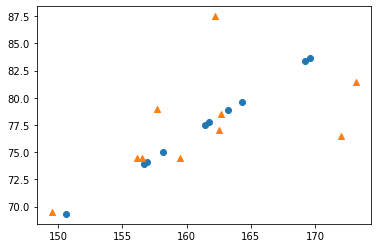

原数据为：
 [[149.5  69.5  38.5]
 [162.5  77.   55.5]
 [162.7  78.5  50.8]
 [162.2  87.5  65.5]
 [156.5  74.5  49. ]
 [156.1  74.5  45.5]
 [172.   76.5  51. ]
 [173.2  81.5  59.5]
 [159.5  74.5  43.5]
 [157.7  79.   53.5]]
降维之后的数据为
 [[149.5156614   69.77540728  38.32524549]
 [162.61871705  79.08765154  54.17531997]
 [162.63695088  77.39127471  51.50352079]
 [162.15135255  86.64452956  66.04282268]
 [156.56681018  75.67486392  48.25451219]
 [156.07789788  74.11133199  45.74662198]
 [172.00159099  76.52797778  50.98224722]
 [173.21474819  81.75934846  59.33543531]
 [159.41874439  73.07111169  44.40667421]
 [157.69752649  78.95650308  53.52760015]]


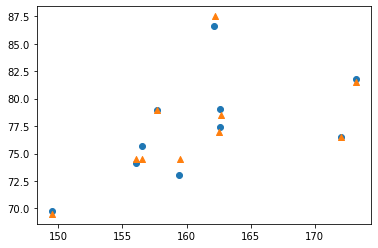

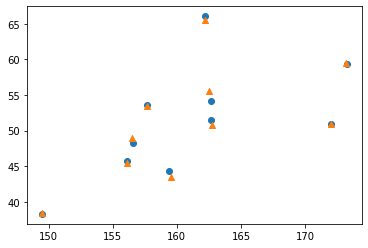

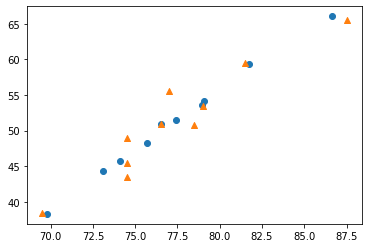

In [9]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import csv


def zeroMean(dataMat):
	meanValue = np.mean(dataMat, axis = 0)
	newData = dataMat - meanValue
	return newData,meanValue

def pca(dataMat,n):
	newData,meanValue = zeroMean(dataMat)
	covMat = np.cov(newData, rowvar = 0)
	eigVals,eigVects = np.linalg.eig(np.mat(covMat))
	eigValIndice = np.argsort(eigVals)
	n_eigValIndice = eigValIndice[-1:-(n+1):-1]
	n_eigVect = eigVects[:,n_eigValIndice]
	lowDDataMat = newData*n_eigVect
	reconDataMat = (lowDDataMat*n_eigVect.T) + meanValue
	return lowDDataMat,reconDataMat

#读取数据
p = r'/Users/mankai/Documents/满凯的资料/课程资料/机器学习基础/作业/data.csv'
with open(p,encoding = 'utf-8') as f:
    dataMat = np.loadtxt(f,delimiter = ",",skiprows = 1)

#执行PCA过程,降2维
lowDDataMat,reconDataMat = pca(dataMat,1)
print("原数据为：\n",dataMat)
print("降维之后的数据为\n",reconDataMat)

#降2维后的图表展示结果
plt.scatter(reconDataMat[:,0].tolist(),reconDataMat[:,1].tolist(), marker='o')
plt.scatter(dataMat[:,0].tolist(),dataMat[:,1].tolist(), marker='^')
plt.show()

#执行PCA过程,降1维
lowDDataMat,reconDataMat = pca(dataMat,2)
print("原数据为：\n",dataMat)
print("降维之后的数据为\n",reconDataMat)

#降1维后的图表展示结果
plt.scatter(reconDataMat[:,0].tolist(),reconDataMat[:,1].tolist(), marker='o')
plt.scatter(dataMat[:,0].tolist(),dataMat[:,1].tolist(), marker='^')
plt.show()

plt.scatter(reconDataMat[:,0].tolist(),reconDataMat[:,2].tolist(), marker='o')
plt.scatter(dataMat[:,0].tolist(),dataMat[:,2].tolist(), marker='^')
plt.show()

plt.scatter(reconDataMat[:,1].tolist(),reconDataMat[:,2].tolist(), marker='o')
plt.scatter(dataMat[:,1].tolist(),dataMat[:,2].tolist(), marker='^')
plt.show()